# Tutorial: Analysis of 3D data cubes

## Example: astronomical images

- Download you favourite galaxy from the THINGS survey database: https://www2.mpia-hd.mpg.de/THINGS/Data.html


- HI emission (21 cm) -> hyperfine structure of the H atom


- See some further details on this lecture:

Spectral analysis:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/119-exercise-spectral-fitting.ipynb

Image analysis:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-2/204-exercise-image-processing-astronomy.ipynb


- I will choose galaxy NGC 3184.


To do list:

1. Read in a fits file containing the 3D data cube of this galaxy.


2. Plot slices of the 3D data cube, use a FOR loop to go over files and print images into a directory.


3. Overlay the HI data (21cm) onto an optical image.

### Libraries:

conda install astropy

conda install -c astropy astroquery

conda install reproject

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

### Open file

In [3]:
filename = '/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/NGC_3184_NA_CUBE_THINGS.FITS'

hdu = fits.open(filename)

FITS files:

- Header

- Data

In [4]:
header_hdu = hdu[0].header

In [5]:
data_hdu = hdu[0].data

In [6]:
#print(header_hdu)
#print(header_hdu.keys)

In [7]:
print(data_hdu.shape)

(1, 72, 1024, 1024)


### Slice data cube

#### 1. Spatial slices

In [8]:
slice_1 = data_hdu[0, 30, :, :]

slice_2 = data_hdu[0, 40, :, :]

slice_3 = data_hdu[0, 50, :, :]

print(slice_1.shape)

(1024, 1024)


In [9]:
%matplotlib inline

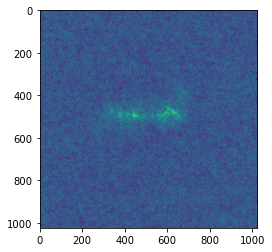

In [10]:
plt.imshow(slice_1)

Text(0.5, 1.0, 'Slice 3')

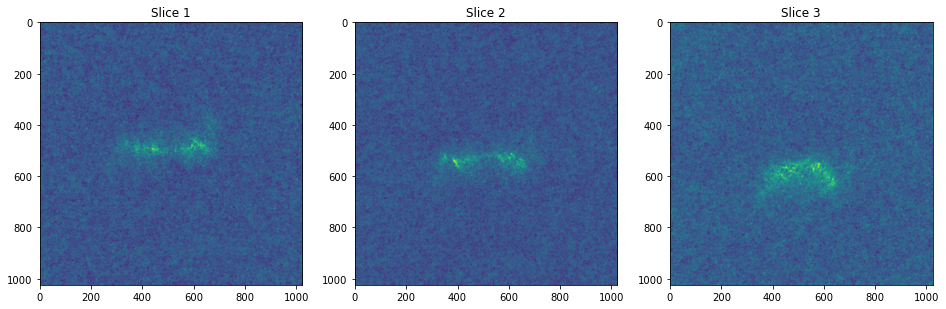

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16,8))

ax1.imshow(slice_1, cmap = 'viridis')
ax1.set_title("Slice 1")

ax2.imshow(slice_2, cmap = 'viridis')
ax2.set_title("Slice 2")

ax3.imshow(slice_3, cmap = 'viridis')
ax3.set_title("Slice 3")

In [11]:
import os

In [ ]:
os.mkdir("./spatial_slices")

## Print all images into this directory:

In [27]:
print(data_hdu.shape[1])

72


In [31]:
1024*1024*8*72

603979776

In [32]:
for i in range(0, data_hdu.shape[1]):
    
    slice = data_hdu[0, i, :, :]
    
    fig  = plt.figure(figsize=(12,12))
    
    ax = fig.add_subplot(1,1,1)
    
    plt.imshow(slice)
    
    plt.savefig("./spatial_slices/spatial_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

In [33]:
#os.mkdir("./spatial_slices")

FileExistsError: [Errno 17] File exists: './spatial_slices'

In [34]:
if os.path.isdir("./spatial_slices"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./spatial_slices")

Directory already exists.


In [35]:
if os.path.isdir("./spatial_slices1"):
    print("Directory already exists.")
else:
    print("Directory is being created.")
    os.mkdir("./spatial_slices1")

Directory is being created.


## With correct units

In [36]:
from astropy.wcs import WCS

In [37]:
for i in range(0, data_hdu.shape[1]):
    
    slice = data_hdu[0, i, :, :]
    
    fig  = plt.figure(figsize=(12,12))
    
    ax = fig.add_subplot(1,1,1, projection = WCS(header_hdu), slices = ('x', 'y', 50, 0))
    
    plt.imshow(slice)
    
    plt.savefig("./spatial_slices1/spatial_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

#### Frequency slices

In [12]:
slice_4 = data_hdu[0,:,:,400]

slice_5 = data_hdu[0,:,:,500]

slice_6 = data_hdu[0,:,:,600]

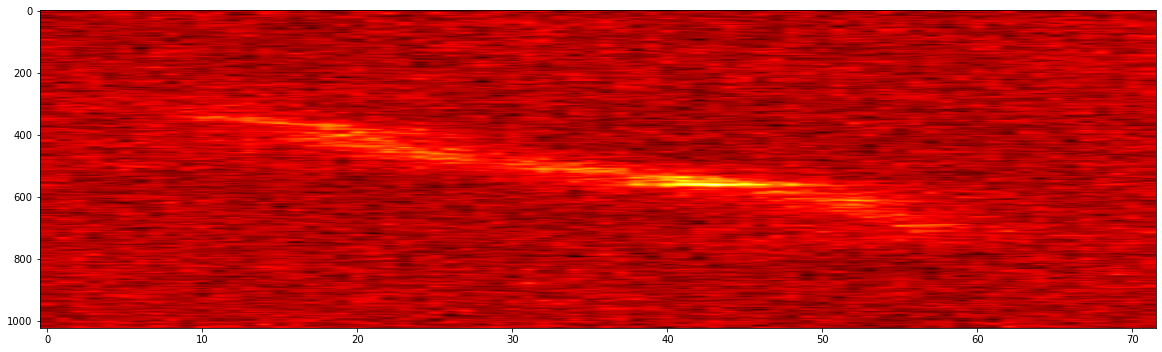

In [13]:
fig, ax = plt.subplots(figsize = (20,20))

plt.imshow(slice_4.T, cmap = "hot", aspect = 1/50)

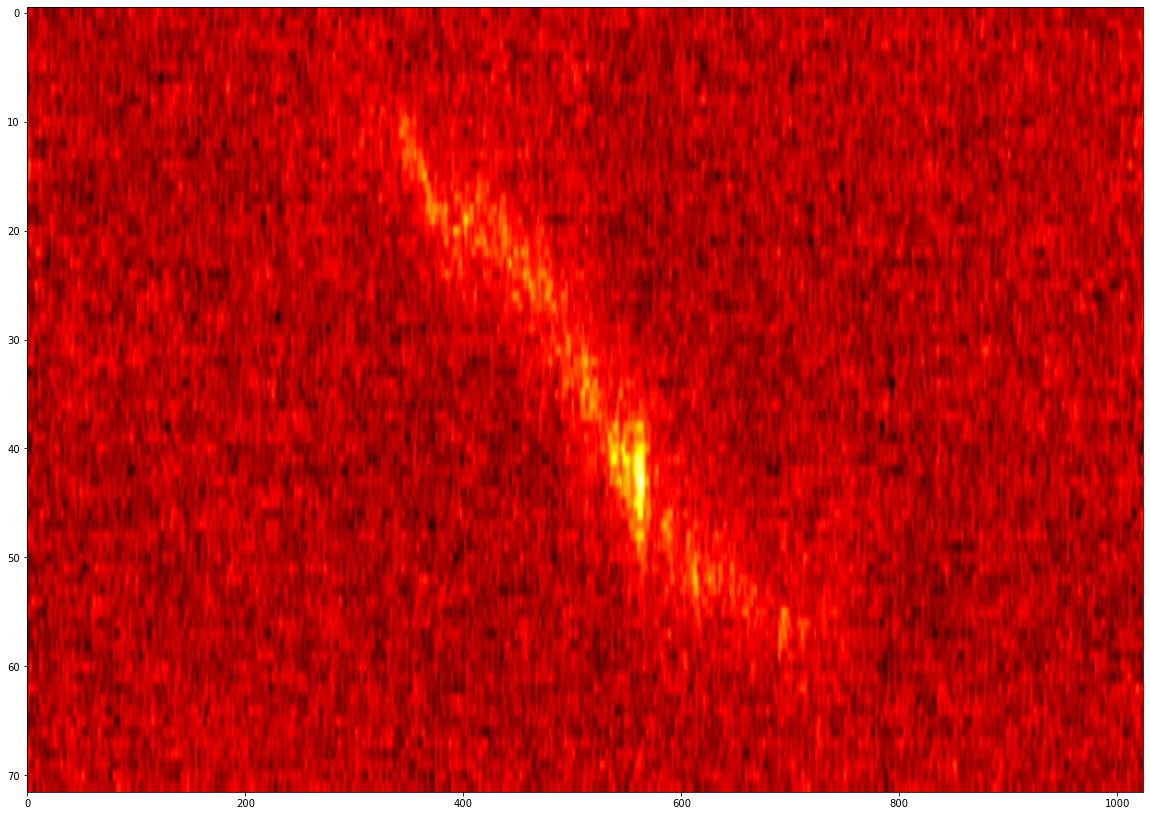

In [14]:
fig, ax = plt.subplots(figsize = (20,40))

plt.imshow(slice_4, cmap = "hot", aspect = 10)

Text(0.5, 1.0, 'Slice 6')

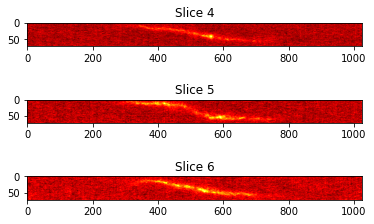

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.imshow(slice_4, cmap = 'hot')
ax1.set_title("Slice 4")

ax2.imshow(slice_5, cmap = 'hot')
ax2.set_title("Slice 5")

ax3.imshow(slice_6, cmap = 'hot')
ax3.set_title("Slice 6")

In [16]:
if os.path.isdir('./frequency_slices'):
    print("directory does exist")
else:
    print("creates directory")
    os.mkdir('./frequency_slices')

creates directory


In [55]:
for i in range(0, data_hdu.shape[2], 10):
    
    slice = data_hdu[0,:,:,i]
    #print(i)
    
    fig = plt.figure(figsize=(11,10))
    
    ax = fig.add_subplot(1,1,1, projection = WCS(header_hdu), slices = (0, 'x', 'y', 0))
    
    plt.imshow(slice, cmap = 'hot', aspect=5)
    
    plt.savefig("./frequency_slices/frequency_slice_{:02d}.png".format(i))

    plt.close() # This is to free the memory, very important!

https://gleamoscope.icrar.org/gleamoscope/trunk/src/

In [17]:
from astropy.coordinates import SkyCoord

from astropy import units as u

In [19]:
coord = SkyCoord(header_hdu['CRVAL1'], header_hdu['CRVAL2'], unit="deg")

In [20]:
print(coord)

<SkyCoord (ICRS): (ra, dec) in deg
    (154.57041667, 41.42444444)>


In [21]:
print(coord.to_string('hmsdms'))

10h18m16.9s +41d25m28s


### Download pptical image from:

https://skyview.gsfc.nasa.gov/current/cgi/titlepage.pl

In [22]:
filename2 = '/Users/webb/Dropbox/Yachay_Tech/Docencia/Fisica_Computacional/Lectures/skv10862997250965.fits'

In [23]:
hdu2 = fits.open(filename2)

In [24]:
header_hdu2 = hdu2[0].header

In [26]:
#print(header_hdu2)

In [27]:
data_hdu2 = hdu2[0].data

In [29]:
print(data_hdu2.shape)

(300, 300)


In [30]:
print(type(data_hdu2))

<class 'numpy.ndarray'>


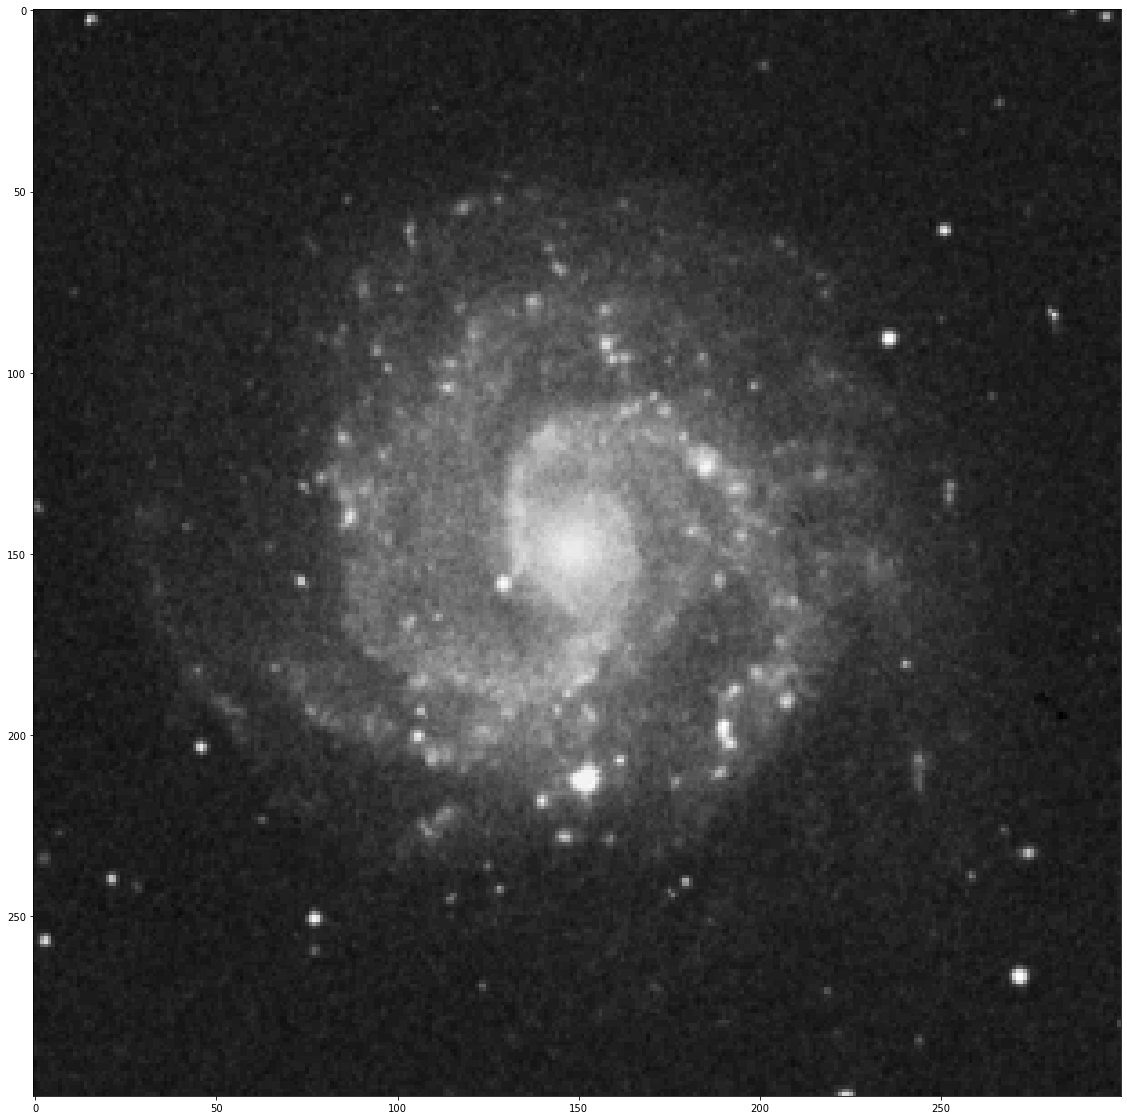

In [34]:
fig, ax = plt.subplots(figsize = (20,20))

plt.imshow(data_hdu2, cmap = 'gray')

**conda install -c astropy astroquery**

In [36]:
from astroquery.skyview import SkyView

In [38]:
path = SkyView.get_images(position=coord.to_string('hmsdms'), width=0.35*u.deg, height=0.35*u.deg, survey=['DSS2 Blue'], pixels=[900,900])



In [39]:
hdulist_opt = path[0]
h_opt = hdulist_opt[0].header
d_opt = hdulist_opt[0].data

In [41]:
print(d_opt.shape)

(900, 900)


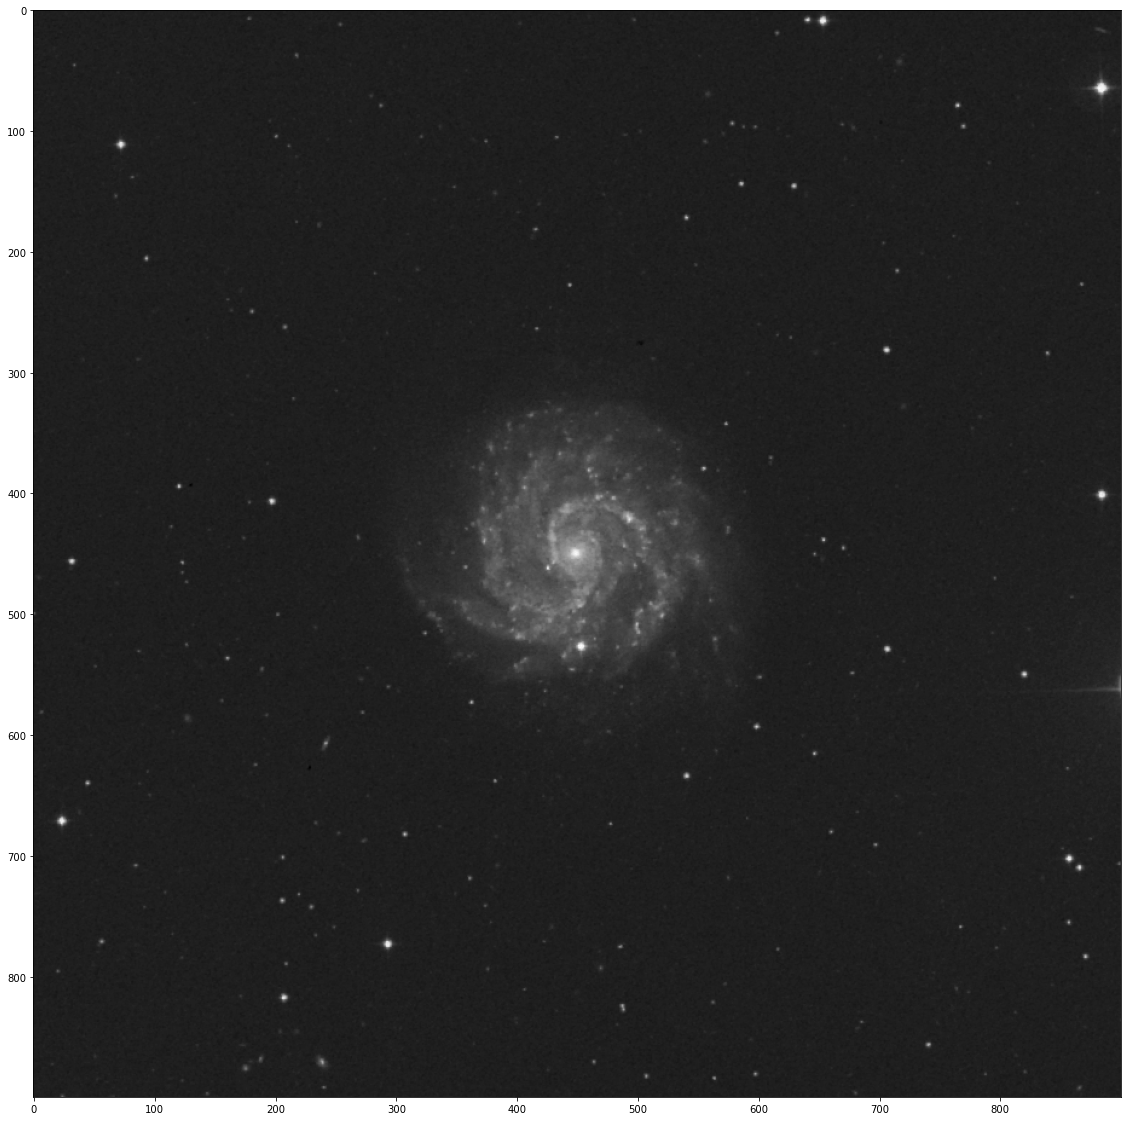

In [42]:
fig, ax = plt.subplots(figsize = (20,20))

plt.imshow(d_opt, cmap = 'gray')

Text(0.5, 1.0, 'Optical')

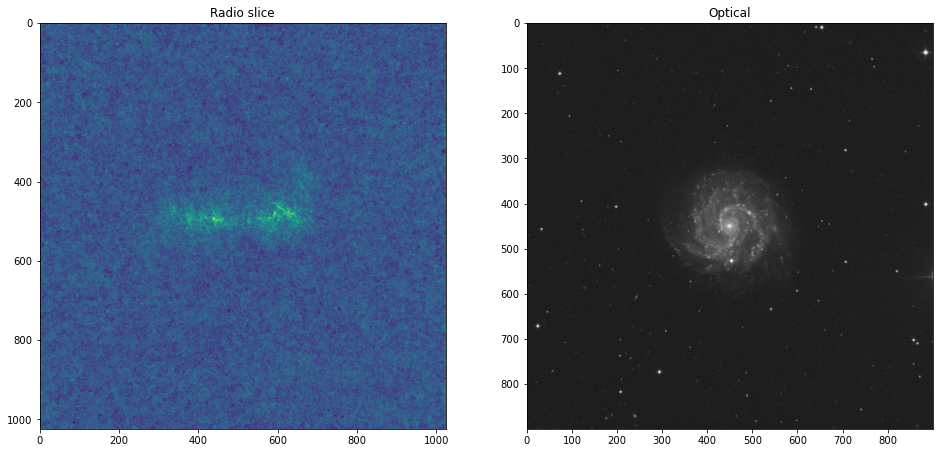

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

ax1.imshow(slice_1, cmap = 'viridis')
ax1.set_title("Radio slice")

ax2.imshow(d_opt, cmap = 'gray')
ax2.set_title("Optical")

## Integrated radio map

In [45]:
print(data_hdu.shape)

(1, 72, 1024, 1024)


In [46]:
radio_data = data_hdu[0,:,:,:]

In [48]:
print(radio_data.shape)

(72, 1024, 1024)


In [49]:
import numpy as np

In [50]:
integrated_map = np.sum(radio_data, axis=0)

In [51]:
print(integrated_map.shape)

(1024, 1024)


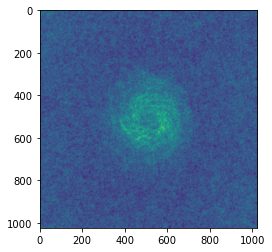

In [52]:
plt.imshow(integrated_map, cmap = 'viridis')

Text(0.5, 1.0, 'Optical')

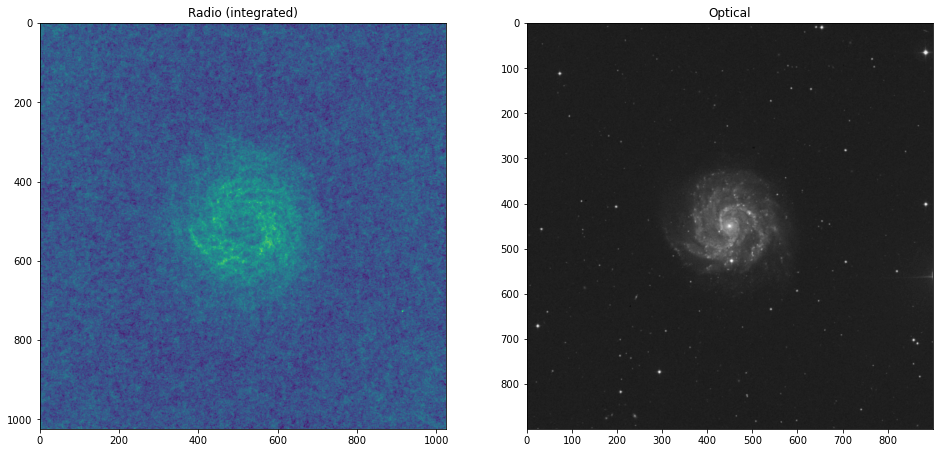

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

ax1.imshow(integrated_map, cmap = 'viridis')
ax1.set_title("Radio (integrated)")

ax2.imshow(d_opt, cmap = 'gray')
ax2.set_title("Optical")

### Spectral lines

In [61]:
spectrum_1 = data_hdu[0, :, 400, 500] # 1D array

spectrum_2 = data_hdu[0, :, 550, 600] # 1D array

In [57]:
print(spectrum_1.shape)

(72,)


In [58]:
print(spectrum_1)

[-1.19714081e-04 -3.04084388e-04 -1.44388032e-04  3.81501268e-05
  2.05614459e-04  4.85415134e-04  8.19252164e-04  6.04216242e-04
  1.32979057e-03  1.92990876e-03  2.52439966e-03  2.66930624e-03
  2.22016987e-03  2.16706167e-03  2.73339194e-03  2.18087342e-03
  2.58726976e-03  1.21089700e-03  1.37216714e-03  8.04469862e-04
  1.18593732e-03  6.77683274e-04  5.86939161e-04  3.08885064e-04
  3.56949313e-04  1.18220283e-04  6.45037973e-04 -1.62860335e-04
 -5.10482569e-05  3.06084621e-05 -6.35295524e-04  2.06607743e-04
  3.87834516e-05 -2.41713016e-04 -5.09558711e-04 -2.88732641e-04
 -5.54114173e-04  2.66078532e-05  8.23299779e-05  3.87665263e-04
 -1.72774071e-05  3.51138908e-04 -3.12419470e-05 -4.46372840e-04
 -1.67691993e-04  6.49524009e-05 -8.90642987e-05 -1.22238152e-05
 -5.47656855e-05  6.69189394e-05 -3.08815099e-04 -1.92626831e-04
 -2.12244093e-04 -4.51085129e-04 -5.17980603e-04  2.97191364e-05
 -7.98618785e-05 -2.21134047e-04 -5.15299500e-04  3.06833856e-04
  2.21017443e-04 -3.47672

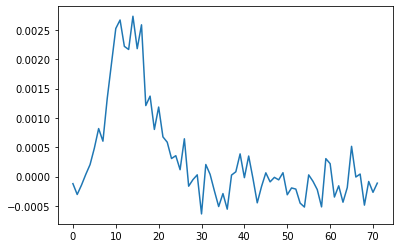

In [60]:
plt.plot(spectrum_1)

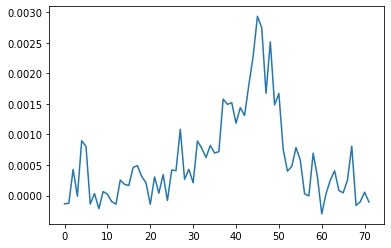

In [62]:
plt.plot(spectrum_2)

In [63]:
print(radio_data.shape)

(72, 1024, 1024)


In [64]:
av_spectra = np.sum(radio_data[:,:,:], axis = 2)

In [66]:
print(av_spectra.shape)

(72, 1024)


In [67]:
av_spectra2 = np.sum(av_spectra[:,:], axis = 1)

In [68]:
print(av_spectra2.shape)

(72,)


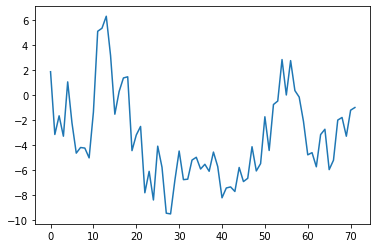

In [69]:
plt.plot(av_spectra2)

In [71]:
#print(header_hdu)

### To get the correct units:

In [74]:
print(header_hdu['CTYPE3'])
print(header_hdu['CDELT3'])
print(header_hdu['CRVAL3'])
print(header_hdu['BUNIT'])

FELO-HEL
-2586.483887
592000.0
JY/BEAM


In [75]:
x_axis = (np.arange(0,len(av_spectra2))*header_hdu['CDELT3']+header_hdu['CRVAL3'])/1000

In [76]:
print(x_axis)

[592.         589.41351611 586.82703223 584.24054834 581.65406445
 579.06758056 576.48109668 573.89461279 571.3081289  568.72164502
 566.13516113 563.54867724 560.96219336 558.37570947 555.78922558
 553.20274169 550.61625781 548.02977392 545.44329003 542.85680615
 540.27032226 537.68383837 535.09735449 532.5108706  529.92438671
 527.33790283 524.75141894 522.16493505 519.57845116 516.99196728
 514.40548339 511.8189995  509.23251562 506.64603173 504.05954784
 501.47306396 498.88658007 496.30009618 493.71361229 491.12712841
 488.54064452 485.95416063 483.36767675 480.78119286 478.19470897
 475.60822509 473.0217412  470.43525731 467.84877342 465.26228954
 462.67580565 460.08932176 457.50283788 454.91635399 452.3298701
 449.74338621 447.15690233 444.57041844 441.98393455 439.39745067
 436.81096678 434.22448289 431.63799901 429.05151512 426.46503123
 423.87854734 421.29206346 418.70557957 416.11909568 413.5326118
 410.94612791 408.35964402]


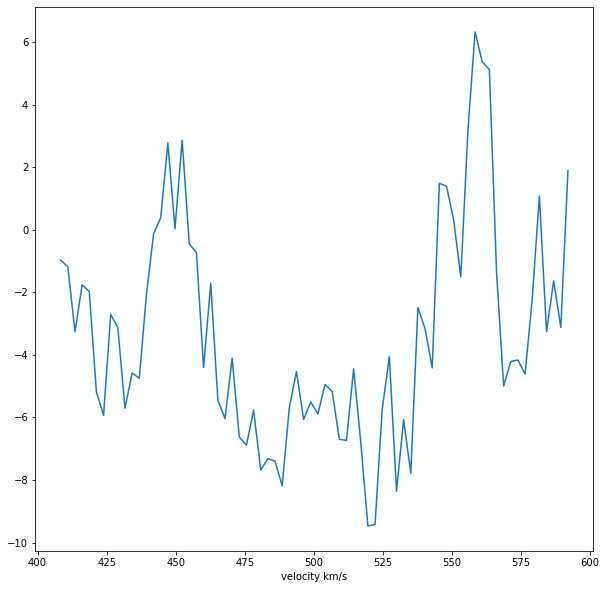

In [78]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('velocity km/s')

plt.plot(x_axis, av_spectra2)

## De-noising data

Text(0.5, 1.0, 'Radio (integrated)')

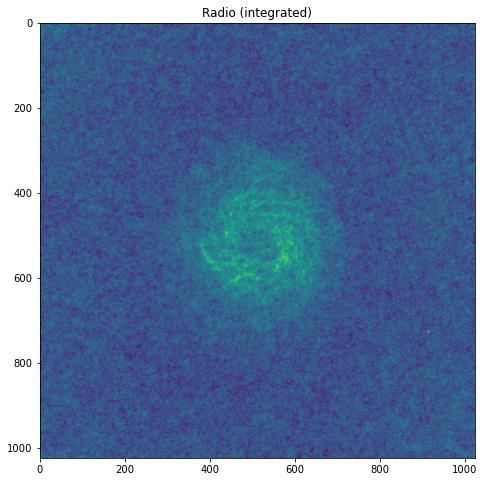

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (16,8))

ax.imshow(integrated_map, cmap = 'viridis')
ax.set_title("Radio (integrated)")

In [81]:
def calculate_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

In [82]:
rms_image = calculate_rms(radio_data[:,:,:])

In [84]:
print(rms_image)

0.000407148


In [85]:
radio_data2 = radio_data

In [86]:
radio_data2[radio_data2 < 5*rms_image] = 0

In [87]:
print(radio_data2.shape)

(72, 1024, 1024)


In [88]:
av_spectra_radio2 = np.sum(radio_data2[:,:,:], axis = 2)

In [89]:
av_spectra2_radio2 = np.sum(av_spectra_radio2[:,:], axis = 1)

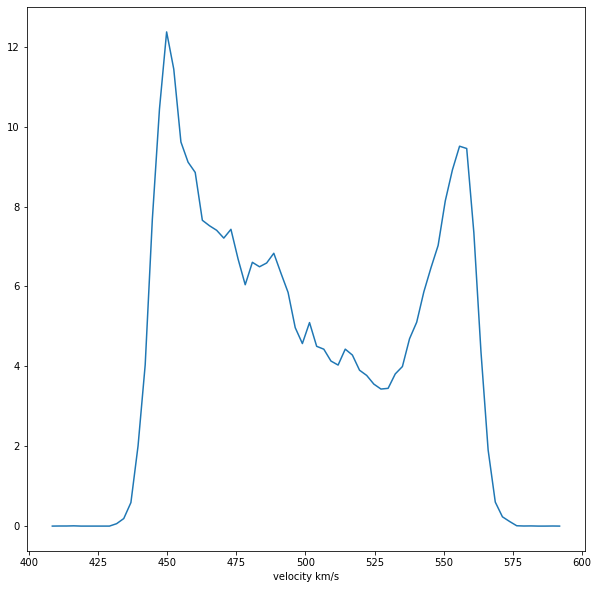

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('velocity km/s')

plt.plot(x_axis, av_spectra2_radio2)

Text(0.5, 1.0, 'Without noise')

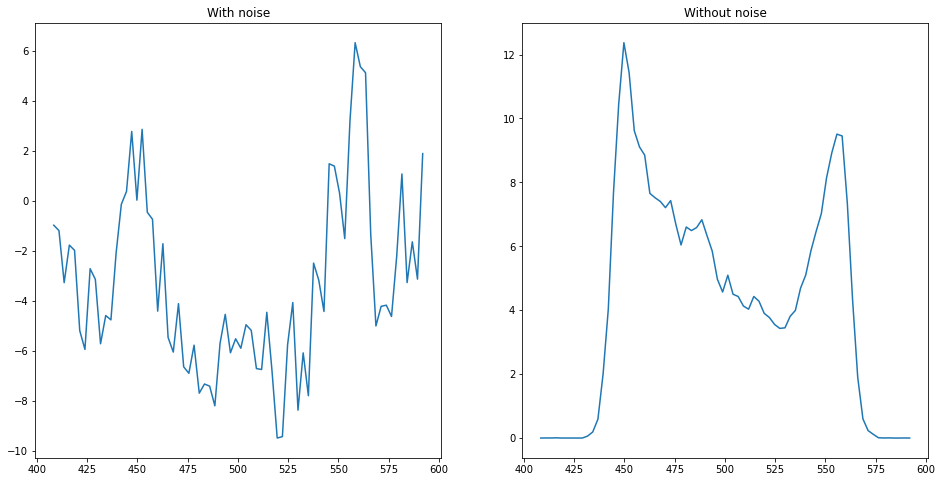

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

ax1.plot(x_axis, av_spectra2)
ax1.set_title("With noise")

ax2.plot(x_axis, av_spectra2_radio2)
ax2.set_title("Without noise")

In [93]:
integrated_map2 = np.sum(radio_data2, axis=0)

Text(0.5, 1.0, 'Without noise')

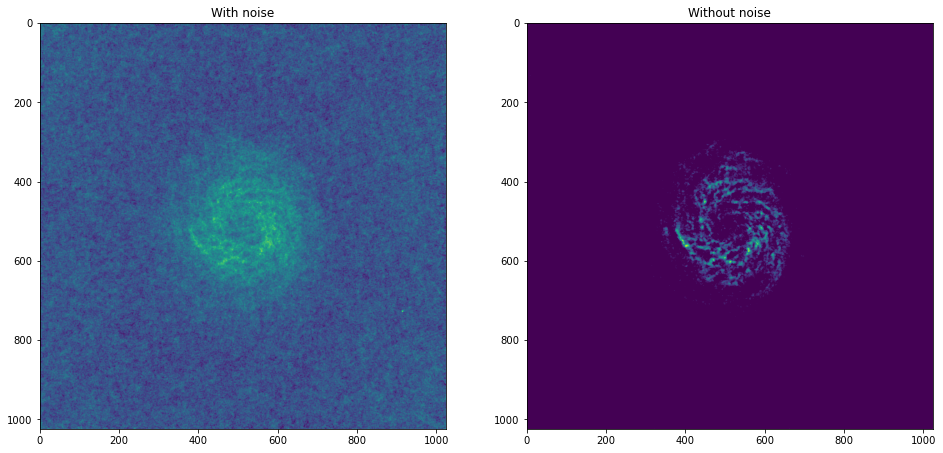

In [94]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8))

ax1.imshow(integrated_map, cmap ='viridis')
ax1.set_title("With noise")

ax2.imshow(integrated_map2, cmap ='viridis')
ax2.set_title("Without noise")